In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# [1-a-i] 평균 걸음 수 분포

In [2]:
df_s = pd.read_csv('./data/all_user_steps.csv')
df_s = df_s.fillna(0)
df_s.head(3)

,USERNAME,DATE,TIME,HOUR,MINUTE,STEPS
0,A01,2016-04-01,00:00:00,0,0,0
1,A01,2016-04-01,00:01:00,0,1,0
2,A01,2016-04-01,00:02:00,0,2,0


In [3]:
StepData = df_s.groupby(['USERNAME', 'DATE'])['STEPS'].sum().reset_index()
StepData = StepData.groupby(['USERNAME'])['STEPS'].mean().reset_index()
StepData.head()

,USERNAME,STEPS
0,A01,6771.02
1,A010,5254.30
2,A016,10700.10
3,A017,13946.88
4,A018,15999.28


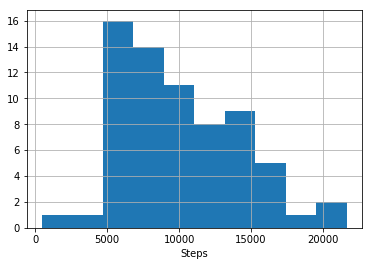

In [4]:
StepData['STEPS'].hist()
plt.xlabel('Steps') 
plt.show()

평균 걸음수 10,000보를 달성하지 못한 경우 : 57.35%


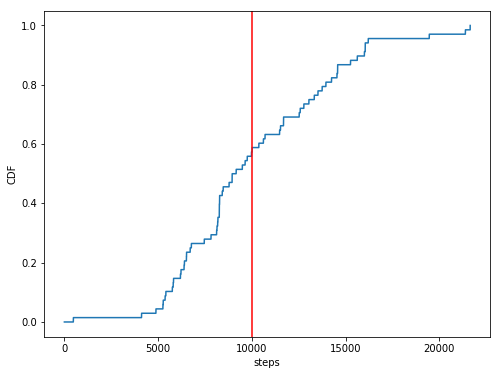

In [5]:
steps_list = [int(steps) for steps in StepData['STEPS']]
steps_list_count = np.zeros(max(steps_list)+1)
for steps in steps_list:
    steps_list_count[int(steps)] +=1
steps_cumsum = steps_list_count.cumsum()
steps_cdf = [cumsum/steps_cumsum[-1] for cumsum in steps_cumsum]
print('평균 걸음수 10,000보를 달성하지 못한 경우 : {0}%'.format(round(steps_cdf[10000]*100,2)))
plt.figure(figsize=(8,6))
plt.plot(steps_cdf)
plt.axvline(x = 10000, color = 'r')
plt.xlabel('steps')
plt.ylabel('CDF')
plt.show()

# [1-a-ii] 평균 수면량 분포

In [6]:
df_SL = pd.read_csv('./data/all_user_sleeps.csv')
df_SL = df_SL.fillna(0)
df_SL.head(3)

,USERNAME,DATE,STARTTIME,MINUTESASLEEP,MINUTESAWAKE,TIMEINBED
0,A01,2016-04-01,02:39:00,485,26,511
1,A01,2016-04-02,02:09:00,512,37,549
2,A01,2016-04-04,01:52:30,335,11,346


In [7]:
SleepData = df_SL.groupby(['USERNAME', 'DATE'])['MINUTESASLEEP'].sum().reset_index()
SleepData = SleepData.groupby(['USERNAME'])['MINUTESASLEEP'].mean().reset_index()
SleepData.head()

,USERNAME,MINUTESASLEEP
0,A01,371.357143
1,A010,420.733333
2,A016,303.900000
3,A017,343.816327
4,A018,370.217391


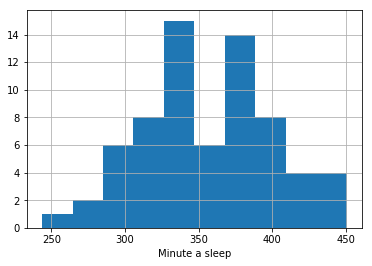

In [8]:
SleepData['MINUTESASLEEP'].hist()
plt.xlabel('Minute a sleep') 
plt.show()

평균 수면 시간이 6시간이 안되는 경우 : 48.53%


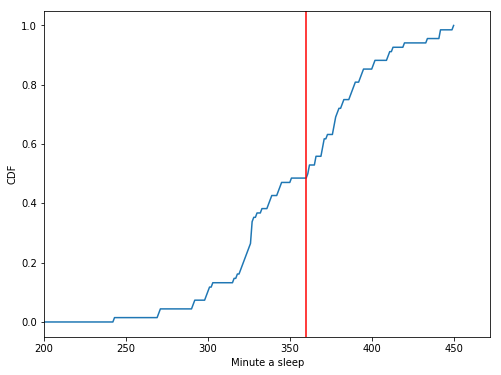

In [9]:
sleep_list = [int(sleep) for sleep in SleepData['MINUTESASLEEP']]
sleep_list_count = np.zeros(max(sleep_list) + 1)
for sleep in sleep_list:
    sleep_list_count[int(sleep)] += 1
sleep_cumsum = sleep_list_count.cumsum()
sleep_cdf = [cumsum/sleep_cumsum[-1] for cumsum in sleep_cumsum]
print('평균 수면 시간이 6시간이 안되는 경우 : {0}%'.format(round(sleep_cdf[360]*100,2)))
plt.figure(figsize = (8,6))
plt.plot(sleep_cdf)
plt.axvline(x = 360, color = 'r')
plt.xlim(200)
plt.xlabel('Minute a sleep')
plt.ylabel('CDF')
plt.show()

# [1-a-iii] 평균 심박수 분포

In [10]:
df_H = pd.read_csv('./data/all_user_hearts.csv')
df_H = df_H.fillna(0)
df_H.head(3)

,USERNAME,DATE,TIME,VALUE
0,A01,2016-04-01,00:00:00,79
1,A01,2016-04-01,00:01:00,80
2,A01,2016-04-01,00:02:00,78


In [11]:
HeartData = df_H.groupby(['USERNAME'])['VALUE'].mean().reset_index()
HeartData.head()

,USERNAME,VALUE
0,A01,81.620110
1,A010,75.746871
2,A016,83.961060
3,A017,77.922819
4,A018,74.145573


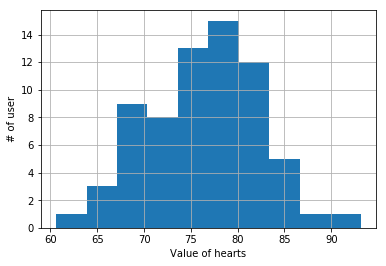

In [12]:
HeartData['VALUE'].hist()
plt.xlabel('Value of hearts')
plt.ylabel('# of user')
plt.show()

하루 평균 심박수가 60이하인 사람들 : 1.47%


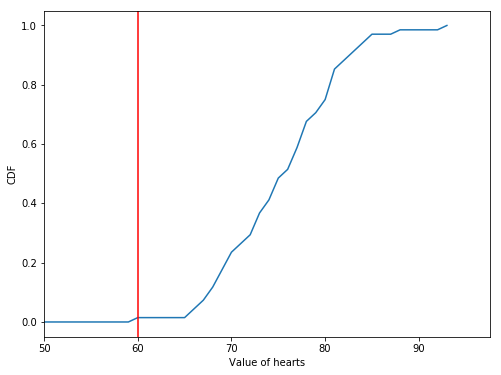

In [13]:
HeartValue_list = [int(Value) for Value in HeartData['VALUE']]
HeartValue_list_count = np.zeros(max(HeartValue_list)+1)
for Value in HeartValue_list:
    HeartValue_list_count[int(Value)] +=1
HeartValue_cumsum = HeartValue_list_count.cumsum()
HeartValue_cdf = [cumsum/HeartValue_cumsum[-1] for cumsum in HeartValue_cumsum]
print('하루 평균 심박수가 60이하인 사람들 : {0}%'.format(round(HeartValue_cdf[60]*100,2)))

plt.figure(figsize=(8,6))
plt.plot(HeartValue_cdf)
plt.axvline(x = 60, color = 'r')
plt.xlim(50)
plt.xlabel('Value of hearts')
plt.ylabel('CDF')
plt.show()

# [1-b] 걸음, 수면 상관관계 요인

In [14]:
df_Step = pd.read_csv('./data/all_user_steps.csv')
df_Step = df_Step.groupby(['USERNAME','DATE'])['STEPS'].sum().reset_index()
df_Step = df_Step.groupby(['DATE'])['STEPS'].mean().reset_index()
df_Step.head()

,DATE,STEPS
0,2016-04-01,11632.500000
1,2016-04-02,10662.938462
2,2016-04-03,7870.104478
3,2016-04-04,16206.477612
4,2016-04-05,13893.089552


In [15]:
df_Sleep = pd.read_csv('./data/all_user_sleeps.csv')
df_Sleep = df_Sleep.groupby(['DATE'])['MINUTESASLEEP'].mean().reset_index()
df_Sleep.head()

,DATE,MINUTESASLEEP
0,2016-04-01,343.771930
1,2016-04-02,336.525424
2,2016-04-03,422.937500
3,2016-04-04,359.189655
4,2016-04-05,335.931034


In [16]:
df = pd.merge(df_Step, df_Sleep, on = ['DATE'])
df.head()

,DATE,STEPS,MINUTESASLEEP
0,2016-04-01,11632.500000,343.771930
1,2016-04-02,10662.938462,336.525424
2,2016-04-03,7870.104478,422.937500
3,2016-04-04,16206.477612,359.189655
4,2016-04-05,13893.089552,335.931034


In [17]:
df_Weather = pd.read_csv('./data/sokulee_weather.csv')
dt = df_Weather['DATETIME']
datetime = []
for i in dt :
    datetime.append(i.split(' ')[0])
df_Weather['DATETIME'] = datetime
df_Weather.head()

,STATION,DATETIME,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY
0,133,2016-04-01,10.8,NaN,0.0,38
1,133,2016-04-01,9.5,NaN,0.1,49
2,133,2016-04-01,8.6,NaN,0.3,49
3,133,2016-04-01,7.8,NaN,1.1,52
4,133,2016-04-01,6.5,NaN,0.1,60


In [18]:
df_MaxTem = df_Weather.groupby(['DATETIME'])['TEMPERATURE'].max().reset_index()
df_MeanHumidity = df_Weather.groupby(['DATETIME'])['HUMIDITY'].mean().reset_index()
df_MeanWindSpeed = df_Weather.groupby(['DATETIME'])['WINDSPEED'].mean().reset_index()
df_Weather =df_Weather.fillna(0)
df_sumrainFall =  df_Weather.groupby(['DATETIME'])['RAINFALL'].sum().reset_index()

df_MaxTem['RAINFALL'] = df_sumrainFall['RAINFALL']
df_MaxTem['WINDSPEED'] = df_MeanWindSpeed['WINDSPEED']
df_MaxTem['HUMIDITY'] = df_MeanHumidity['HUMIDITY']
df_Weather = df_MaxTem
df_Weather = df_Weather.rename(columns = {'DATETIME' : 'DATE'})
df_Weather.head()

,DATE,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY
0,2016-04-01,24.9,0.0,0.979167,37.208333
1,2016-04-02,24.1,0.0,1.145833,40.958333
2,2016-04-03,16.3,2.5,1.379167,64.916667
3,2016-04-04,18.0,0.0,1.887500,72.375000
4,2016-04-05,20.5,0.0,1.712500,40.125000


In [19]:
df = pd.merge(df, df_Weather, on = ['DATE'] ,how ='left')
df.head()

,DATE,STEPS,MINUTESASLEEP,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY
0,2016-04-01,11632.500000,343.771930,24.9,0.0,0.979167,37.208333
1,2016-04-02,10662.938462,336.525424,24.1,0.0,1.145833,40.958333
2,2016-04-03,7870.104478,422.937500,16.3,2.5,1.379167,64.916667
3,2016-04-04,16206.477612,359.189655,18.0,0.0,1.887500,72.375000
4,2016-04-05,13893.089552,335.931034,20.5,0.0,1.712500,40.125000


In [20]:
# 요일 정보 삽입
import datetime
weekday = []
for i in df['DATE'] :
    weekday.append(datetime.datetime(int(i.split('-')[0]),int(i.split('-')[1]),int(i.split('-')[2])).weekday())
df['WEEKDAY'] = weekday
del df['DATE']
df.head()

,STEPS,MINUTESASLEEP,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY,WEEKDAY
0,11632.500000,343.771930,24.9,0.0,0.979167,37.208333,4
1,10662.938462,336.525424,24.1,0.0,1.145833,40.958333,5
2,7870.104478,422.937500,16.3,2.5,1.379167,64.916667,6
3,16206.477612,359.189655,18.0,0.0,1.887500,72.375000,0
4,13893.089552,335.931034,20.5,0.0,1.712500,40.125000,1


C:\Users\KIMJINSEOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


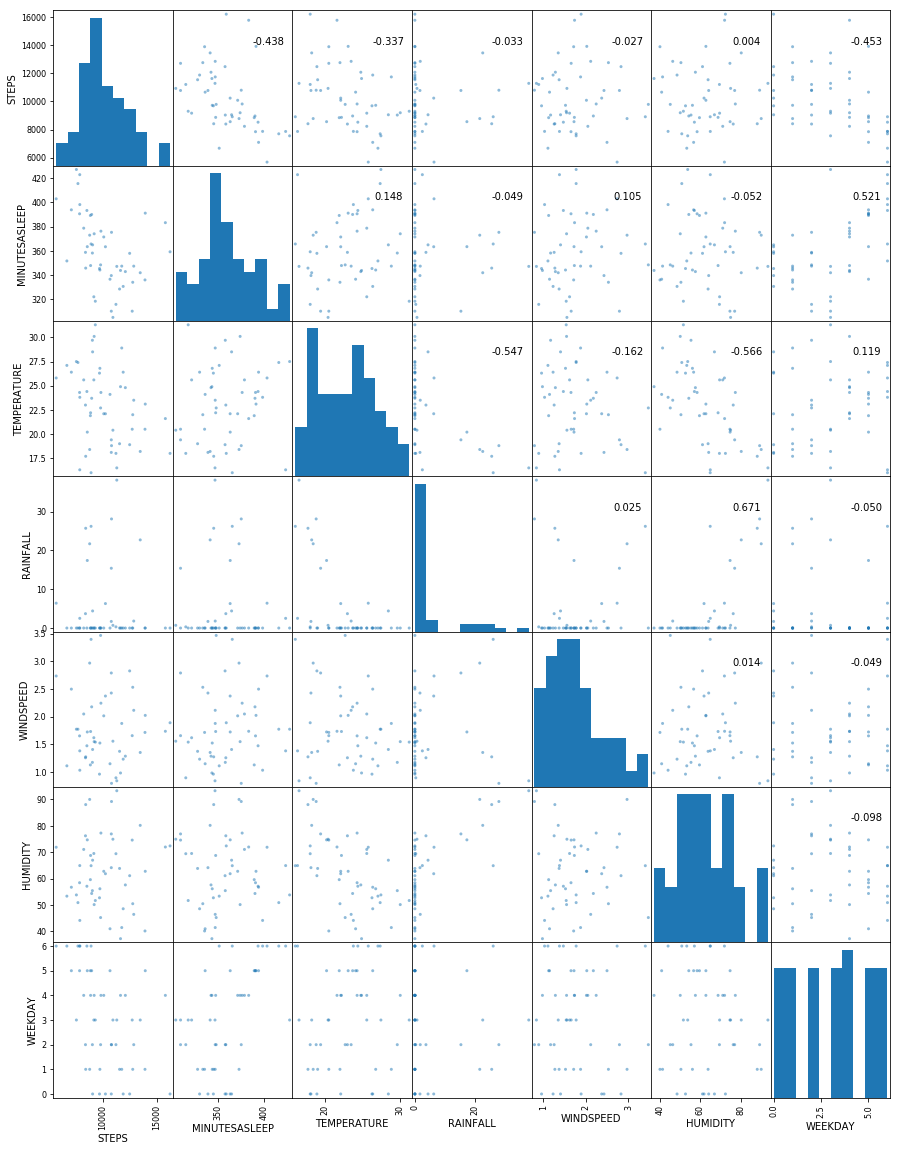

In [21]:
axes = pd.plotting.scatter_matrix(df, figsize = (15,20), alpha = 0.5)

corr = df.corr().as_matrix()
for i,j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i,j].annotate("%.3f" %corr[i,j],(0.8, 0.8), xycoords = 'axes fraction', ha = 'center', va ='center')
plt.show()

# [1-b-i] 요일

In [22]:
import datetime
weekday = []
df_Step = pd.read_csv('./data/all_user_steps.csv')
df_Step = df_Step.groupby(['USERNAME','DATE'])['STEPS'].sum().reset_index()

for i in df_Step['DATE'] :
    weekday.append(datetime.datetime(int(i.split('-')[0]),int(i.split('-')[1]),int(i.split('-')[2])).weekday())
df_Step['WEEKDAY'] = weekday
df_Step.head()

,USERNAME,DATE,STEPS,WEEKDAY
0,A01,2016-04-01,13468,4
1,A01,2016-04-02,9446,5
2,A01,2016-04-03,6084,6
3,A01,2016-04-04,20283,0
4,A01,2016-04-05,12881,1


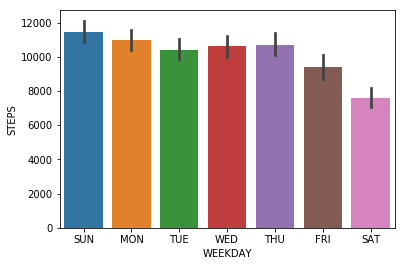

In [23]:
sns.barplot(x="WEEKDAY", y="STEPS", data=df_Step)

plt.xticks(range(0,7),['SUN','MON','TUE','WED','THU','FRI','SAT'])
plt.show()

In [24]:
import datetime
weekday = []

df_Sleep = pd.read_csv('./data/all_user_sleeps.csv')
df_Sleep = df_Sleep.groupby(['USERNAME','DATE'])['MINUTESASLEEP'].mean().reset_index()
for i in df_Sleep['DATE'] :
    weekday.append(datetime.datetime(int(i.split('-')[0]),int(i.split('-')[1]),int(i.split('-')[2])).weekday())
df_Sleep['WEEKDAY'] = weekday
df_Sleep.head()

,USERNAME,DATE,MINUTESASLEEP,WEEKDAY
0,A01,2016-04-01,485,4
1,A01,2016-04-02,512,5
2,A01,2016-04-04,335,0
3,A01,2016-04-05,311,1
4,A01,2016-04-06,491,2


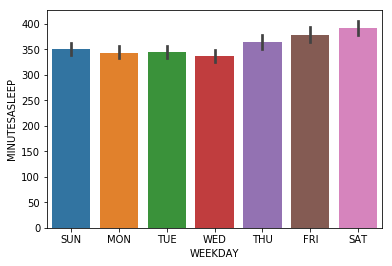

In [25]:
sns.barplot(x="WEEKDAY", y="MINUTESASLEEP", data=df_Sleep)
plt.xticks(range(0,7),['SUN','MON','TUE','WED','THU','FRI','SAT'])
plt.show()

# [1-b-ii] 최고기온

In [26]:
df_Step = pd.read_csv('./data/all_user_steps.csv')
df_Step = df_Step.groupby(['USERNAME','DATE'])['STEPS'].sum().reset_index()
df_Step = df_Step.groupby(['DATE'])['STEPS'].mean().reset_index()

UseData = pd.merge(df_Step, df_Weather, on = ['DATE'] ,how ='left')
UseData.head()

,DATE,STEPS,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY
0,2016-04-01,11632.500000,24.9,0.0,0.979167,37.208333
1,2016-04-02,10662.938462,24.1,0.0,1.145833,40.958333
2,2016-04-03,7870.104478,16.3,2.5,1.379167,64.916667
3,2016-04-04,16206.477612,18.0,0.0,1.887500,72.375000
4,2016-04-05,13893.089552,20.5,0.0,1.712500,40.125000


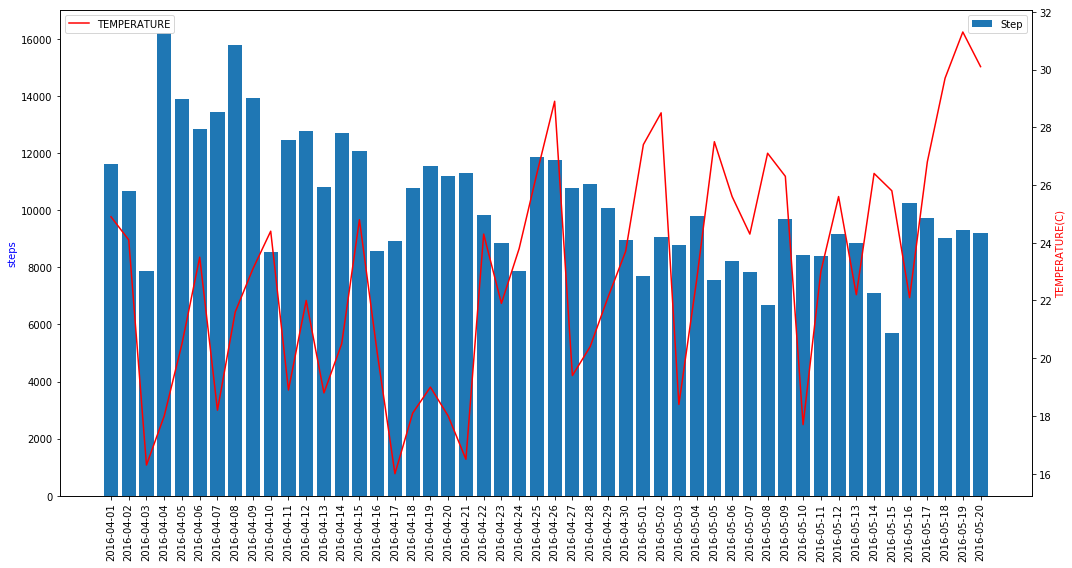

In [27]:
fig, ax1 = plt.subplots(figsize=(15, 8))
t = UseData['DATE']
s2 = UseData['STEPS']

ax1.bar(t, s2)
ax1.set_ylabel('steps',color = 'b')
plt.xticks(rotation=90)
plt.legend(['Step'])

ax2 = ax1.twinx()
s1 = UseData['TEMPERATURE']
ax2.plot(t, s1, color = 'r')
ax2.set_xlabel('DATE')
ax2.set_ylabel('TEMPERATURE(C)',color = 'r')
fig.tight_layout()
plt.legend(['TEMPERATURE'])
    
plt.show()

# [1-b-iii] 강수량

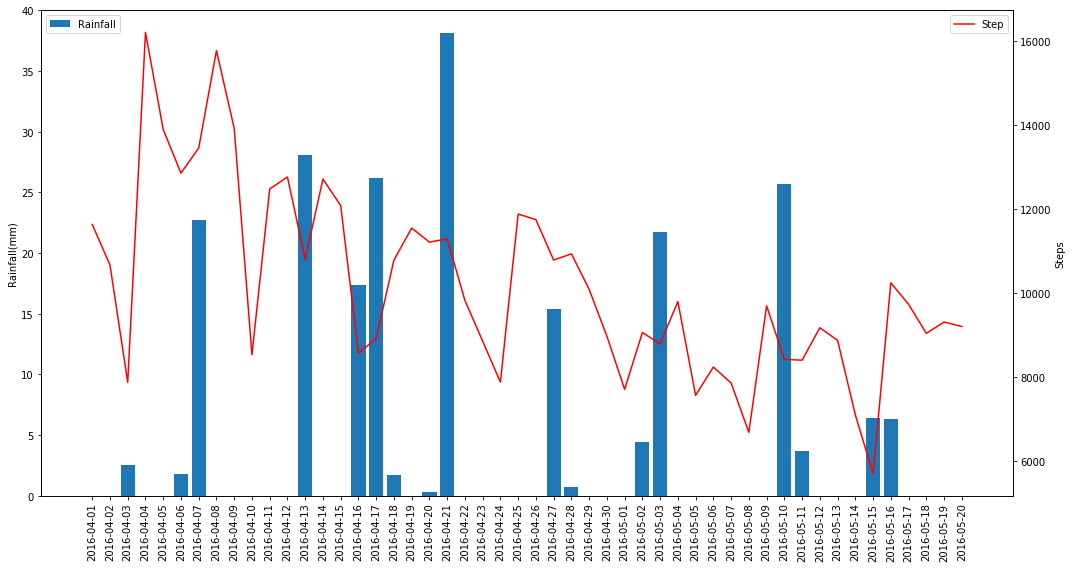

In [28]:
fig, ax1 = plt.subplots(figsize=(15, 8))
t = UseData['DATE']

s2 = UseData['RAINFALL']

ax1.bar(t, s2)
ax1.set_ylabel('Rainfall(mm)')
plt.xticks(rotation=90)
ax1.legend(['Rainfall'],loc='upper left')

ax2 = ax1.twinx()
s1 = UseData['STEPS']
ax2.plot(t, s1, color = 'r')
ax2.set_xlabel('DATE')
ax2.set_ylabel('Steps')
fig.tight_layout()
ax2.legend(['Step'])
    
plt.show()

# [1-c] Fitbit 하루 이용자 변화 분석

In [29]:
df_H = pd.read_csv('./data/all_user_hearts.csv')
df_H = df_H.fillna(0)
df_H.head(3)

,USERNAME,DATE,TIME,VALUE
0,A01,2016-04-01,00:00:00,79
1,A01,2016-04-01,00:01:00,80
2,A01,2016-04-01,00:02:00,78


In [30]:
HeartData = df_H.groupby(['USERNAME','DATE'])['VALUE'].mean().reset_index()
HeartData.head()

,USERNAME,DATE,VALUE
0,A01,2016-04-01,84.276132
1,A01,2016-04-02,83.300429
2,A01,2016-04-03,87.374734
3,A01,2016-04-04,83.575121
4,A01,2016-04-05,83.615627


In [31]:
FL = [x for x in os.listdir('sokulee/') if x.find("A") != -1 ]
name = []
date = []
makeName =[]
makeDate =[]
for Name in FL:
    name.append(Name)

for i in range(20160401,20160431):
    date.append(i)
for i in range(20160501,20160521):
    date.append(i)

for A in name:
    for B in date :
        makeName.append(A)
        makeDate.append(B)
newData = pd.DataFrame()
newData['USERNAME'] = makeName
newData['DATE'] = makeDate
newData.head()

,USERNAME,DATE
0,A01,20160401
1,A01,20160402
2,A01,20160403
3,A01,20160404
4,A01,20160405


In [32]:
Date = []
for i in HeartData['DATE']:
    Date.append(i.split('-')[0] + i.split('-')[1]+ i.split('-')[2])
HeartData['DATE'] = Date
HeartData.head()

,USERNAME,DATE,VALUE
0,A01,20160401,84.276132
1,A01,20160402,83.300429
2,A01,20160403,87.374734
3,A01,20160404,83.575121
4,A01,20160405,83.615627


In [33]:
HeartData['DATE'] = HeartData['DATE'].astype(int)
newData['DATE'] = newData['DATE'].astype(int)
UseData = pd.merge(newData, HeartData, on = ['DATE','USERNAME'] ,how ='left')
UseData = UseData.fillna(0)

UseData.head() 

,USERNAME,DATE,VALUE
0,A01,20160401,84.276132
1,A01,20160402,83.300429
2,A01,20160403,87.374734
3,A01,20160404,83.575121
4,A01,20160405,83.615627


In [34]:
Count = []
FindData = UseData[UseData['VALUE'] == 0]
index = FindData.index
d = 0
for i in UseData['DATE']:
    if d in index:
        Count.append(0)
    else:
        Count.append(1)
    d = d + 1
UseData['Count'] = Count
UseData.head(5)

,USERNAME,DATE,VALUE,Count
0,A01,20160401,84.276132,1
1,A01,20160402,83.300429,1
2,A01,20160403,87.374734,1
3,A01,20160404,83.575121,1
4,A01,20160405,83.615627,1


In [35]:
UseData = UseData.groupby(['DATE'])['Count'].sum().reset_index()

date = []
for da in UseData['DATE']:
    date.append(str(da)[0:4] +"-" + str(da)[4:6]+"-" + str(da)[6:8])
UseData['DATE'] = date
UseData.head()

,DATE,Count
0,2016-04-01,51
1,2016-04-02,51
2,2016-04-03,65
3,2016-04-04,65
4,2016-04-05,66


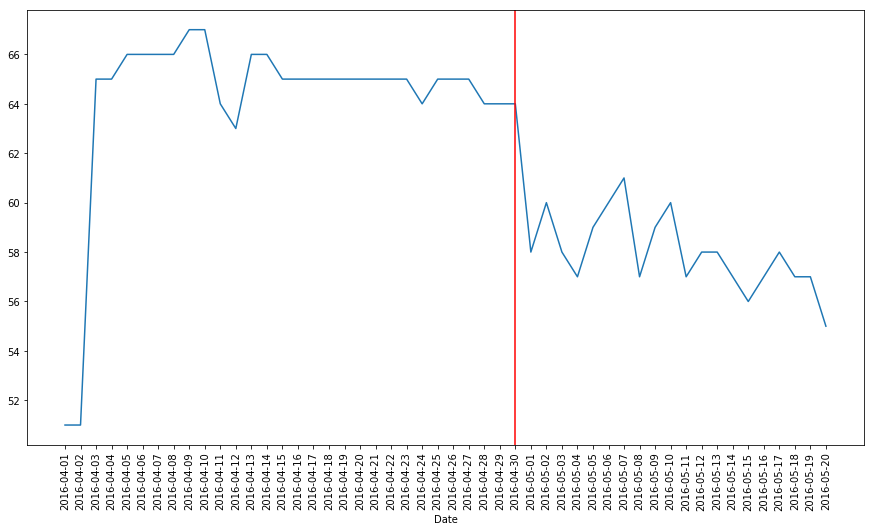

In [36]:
plt.subplots(figsize=(15, 8))
plt.plot(UseData['DATE'], UseData['Count'])
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.axvline(color = 'r' ,x = '2016-04-30')
plt.show()